In [1]:
import pandas as pd
import numpy as np
import pylab as plt
from sklearn import linear_model as lm
import seaborn as sbn

This will be a regression based notebook for the kaggle competition found here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques.  The goal is to utilize multivariate regression before implementing regularizers ridge and lasso.

We first perform some exploratory analysis

In [2]:
df = pd.read_csv('data/train.csv')
print(df.SalePrice.describe())


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


From intro stats lets check the data with the 68-95-99.7 rule with respect to one-, two-, and three-standard deviations

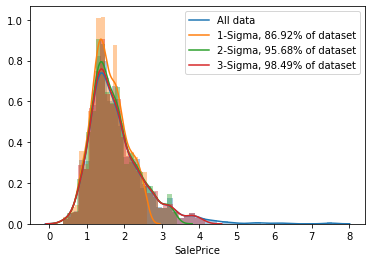

In [3]:
def trim(df,std_dev=1, scale = False, return_df = False):
    mu = df.SalePrice.mean()
    sigma = df.SalePrice.std()
    if scale:
        scale = 100000
    else:
        scale = 1
    trimmed_df = df.loc[(abs(df.SalePrice) <= (mu + std_dev*sigma))]
    data = trimmed_df.SalePrice
    if return_df:
        return trimmed_df
    else:
        label = str(std_dev) + "-Sigma, " + str(round(100*data.shape[0]/df.SalePrice.shape[0],2)) + "% of dataset"
        sbn.distplot(data/scale, kde_kws = {"label": label})
    

sbn.distplot(df.SalePrice/100000, kde_kws={"label": "All data"})
trim(df,1,True)
trim(df,2,True)
trim(df,3,True)

Text(0.5, 1.0, 'Scaled Standard Deviations')

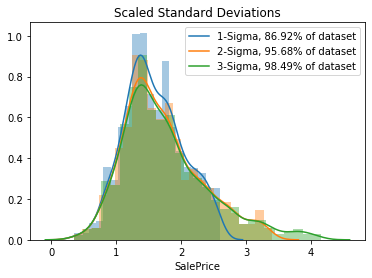

In [4]:
trim(df,1,True)
trim(df,2,True)
trim(df,3,True)
plt.title('Scaled Standard Deviations')

To keep as many records as possible, we subset the data on records within 3 standard deviations of the mean.  Next we'll try to eliminate features via testing for multi-collinearity, but first let's look at how many records are missing per feature:

In [9]:
df = trim(df,3,return_df = True)
print(df.select_dtypes(exclude = ['object']).isnull().sum()) #return numerical features only)
#print(df.isnull().sum()) #return numerical features only)

Id                 0
MSSubClass         0
LotFrontage      256
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         7
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64
